In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
## Read the dataset

df=pd.read_csv('stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

## Data Checks to Perform
1. Check Missing Values
2. Check Duplicates
3. Check Data type
4. Check the unique values of each columns
5. Check the Statistics of Dataset
6. Check various categories present in the different Categorical column



In [6]:
## check missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

## Insights or Observations

There are no missing values

In [7]:
## DUplicates Check

df.duplicated().sum()

0

There are no duplicate values in the dataset


There are 4 columns with object type or Categorical data type and 3 columns with integer data type

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- ALL three numerical columns have almost same mean or close to each other . 

- standard deviation is also almost same or close to each other between 14.6 to 15.19


- Math_score has 0 minimum score but reading and writing score has minimum of 17 and 10.

.

In [34]:
## seggregate categorical and numerical fetaures

numerical_feature=[column  for column in df.columns if df[column].dtype!='O']

In [35]:
numerical_feature

['math_score', 'reading_score', 'writing_score']

In [9]:
## Check Data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [42]:
df.nunique()

gender                           2
race_ethnicity                   5
parental_level_of_education      6
lunch                            2
test_preparation_course          2
math_score                      81
reading_score                   72
writing_score                   77
total_score                    194
avg_score                      194
dtype: int64

In [36]:
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']

In [37]:
categorical_feature

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [38]:
df['total_score']=df['math_score']+df['reading_score']+ df['writing_score']
df['avg_score']=df['total_score']/3

In [39]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<AxesSubplot:xlabel='avg_score', ylabel='Count'>

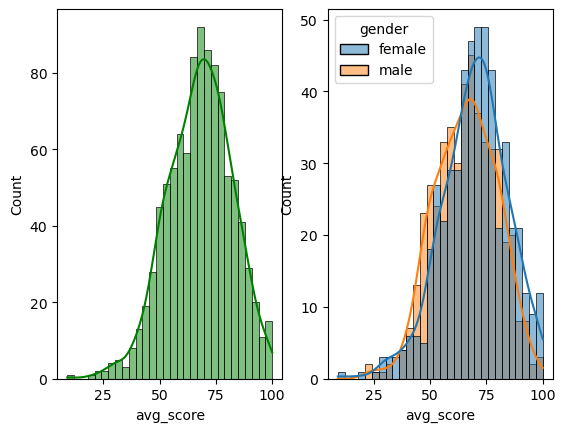

In [45]:
### Explore Visulization

fig,axis=plt.subplots(1,2)
plt.subplot(121)
sns.histplot(data=df,x='avg_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='avg_score',bins=30,kde=True,hue='gender')

Female Students tends to perform better than male students.

<AxesSubplot:xlabel='avg_score', ylabel='Count'>

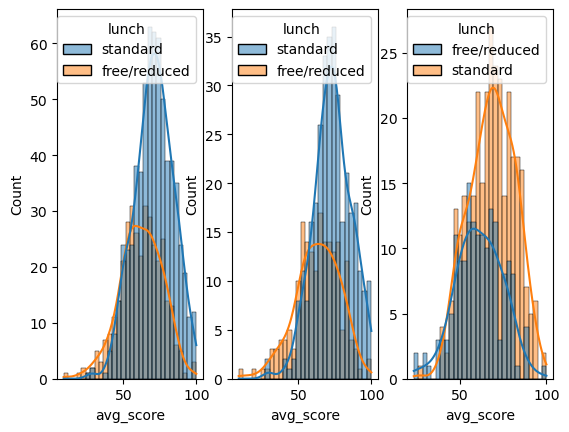

In [49]:
fig,axis=plt.subplots(1,3)
plt.subplot(131)
sns.histplot(data=df,x='avg_score',bins=30,kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='avg_score',bins=30,kde=True,hue='lunch')

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='avg_score',bins=30,kde=True,hue='lunch')

Standard lunch helps students perform well in exam
- Standard luch helps perform in exam be male or female.

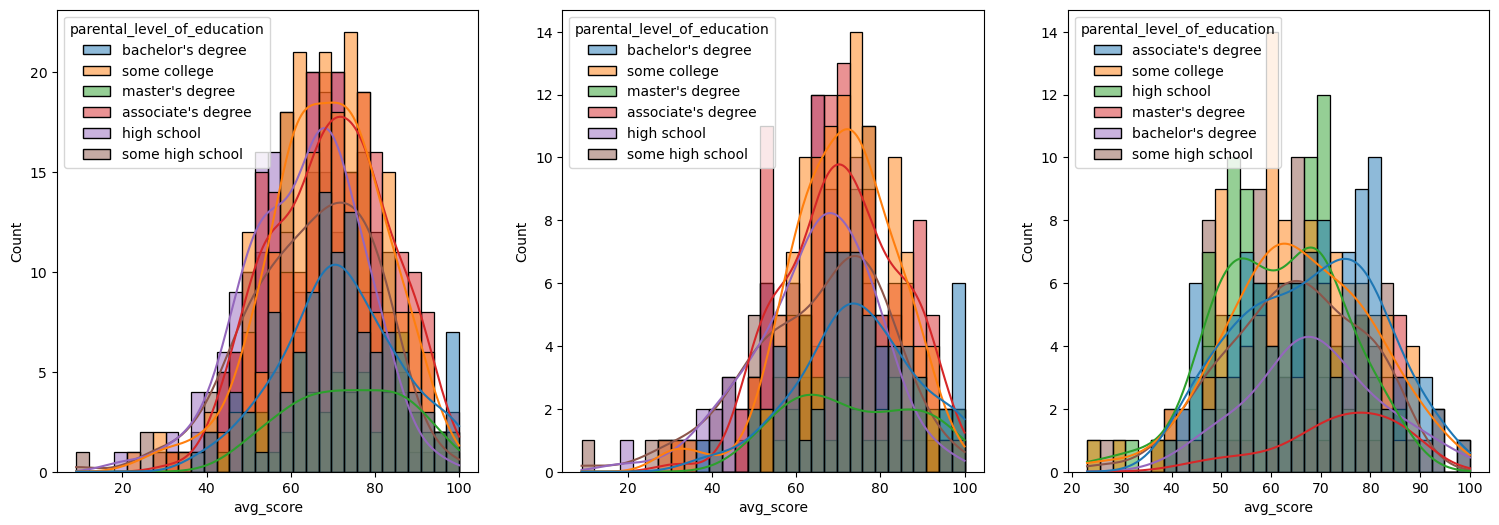

In [60]:
fig,axis=plt.subplots(1,3,figsize=(25,6))

plt.subplot(141)
sns.histplot(data=df,x='avg_score',bins=30,kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='avg_score',bins=30,kde=True,hue='parental_level_of_education')

plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='avg_score',bins=30,kde=True,hue='parental_level_of_education')

plt.show()

1st plot:- In General parents education does not help student perform well.
2nd plot:- there is no effect of the parents education in female students
3rd plot :- it shows thats male students performs well if parents have master's degree

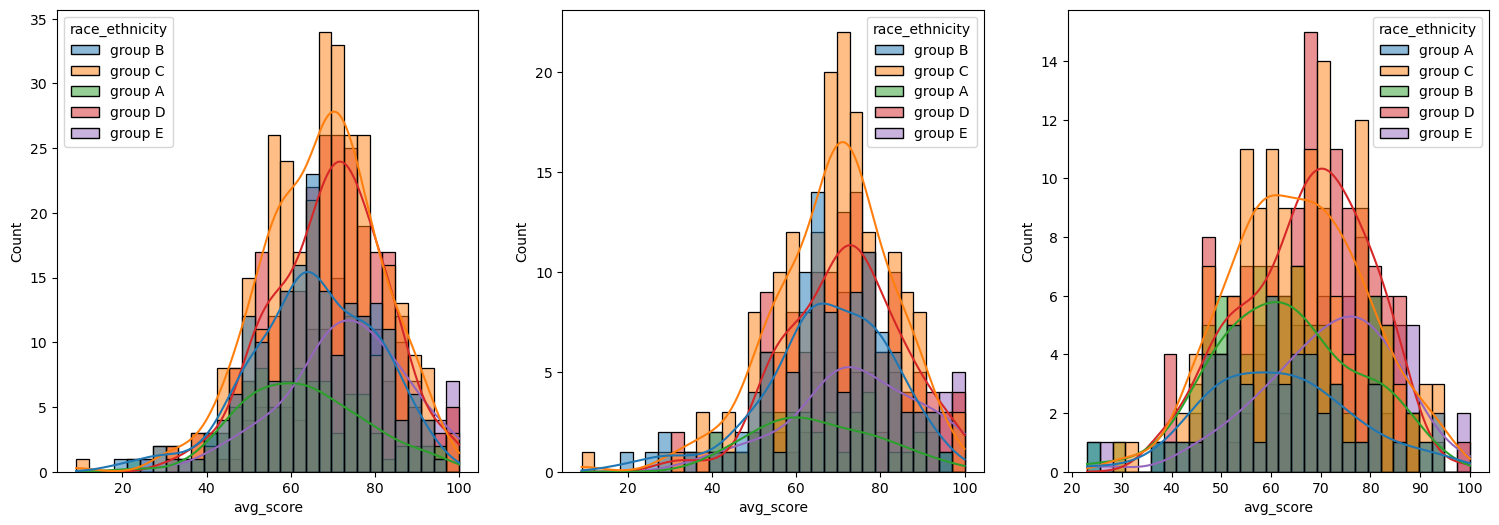

In [61]:
fig,axis=plt.subplots(1,3,figsize=(25,6))

plt.subplot(141)
sns.histplot(data=df,x='avg_score',bins=30,kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='avg_score',bins=30,kde=True,hue='race_ethnicity')

plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='avg_score',bins=30,kde=True,hue='race_ethnicity')

plt.show()

- in general student of group A and B performs poorly in exams.
- students whether male or female performs poorly in exam belong to group A and B

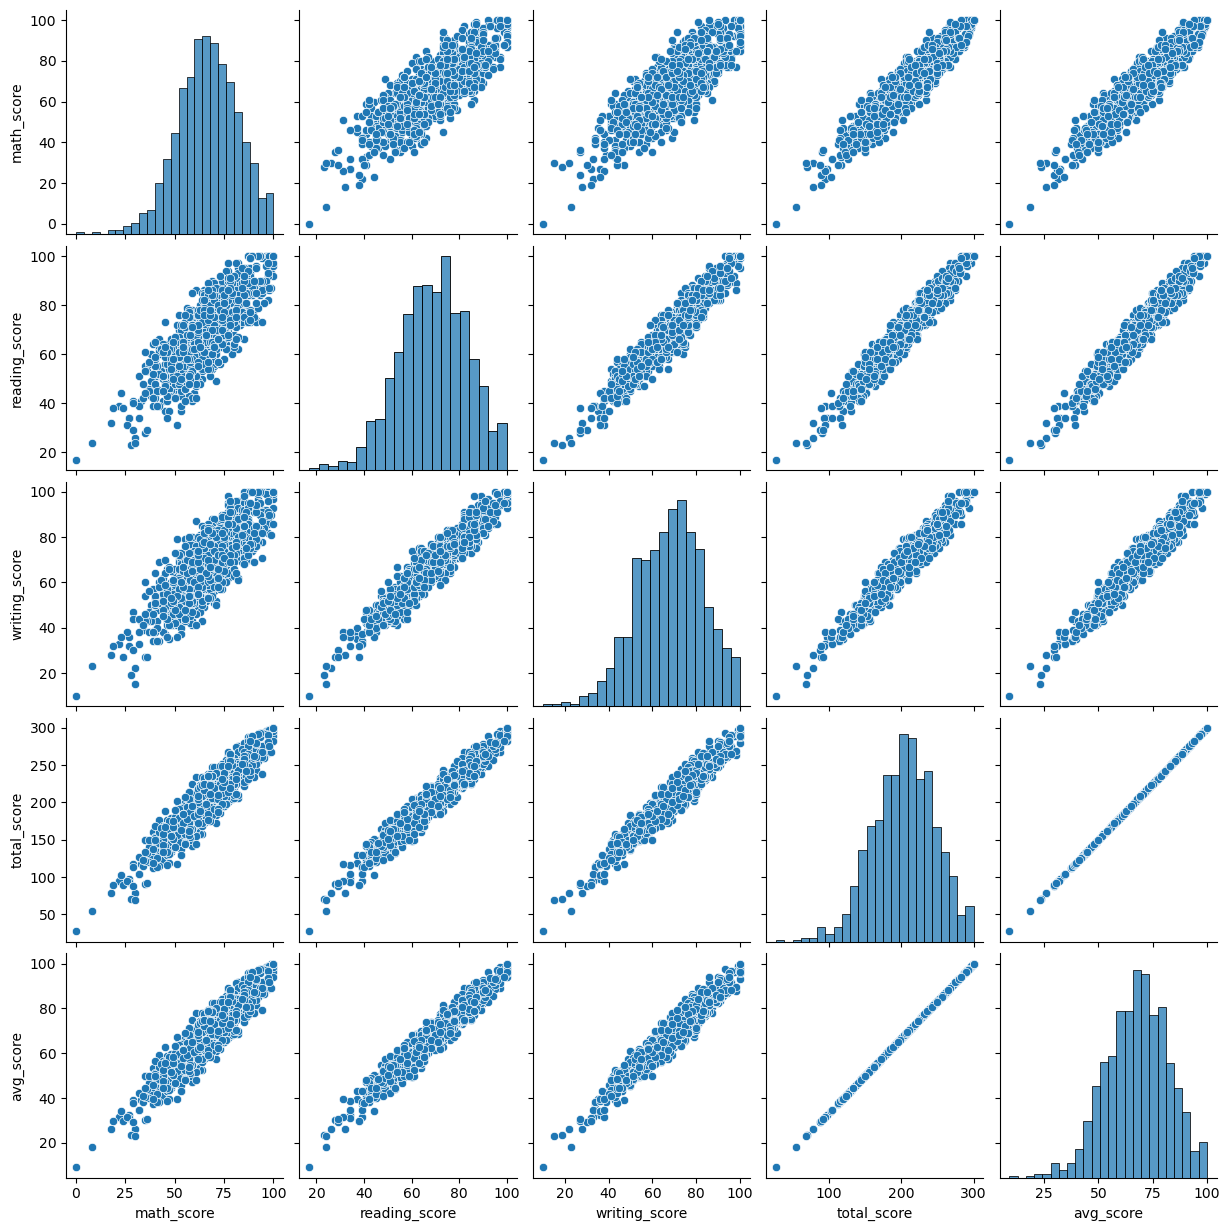

In [63]:
sns.pairplot(df)

<AxesSubplot:>

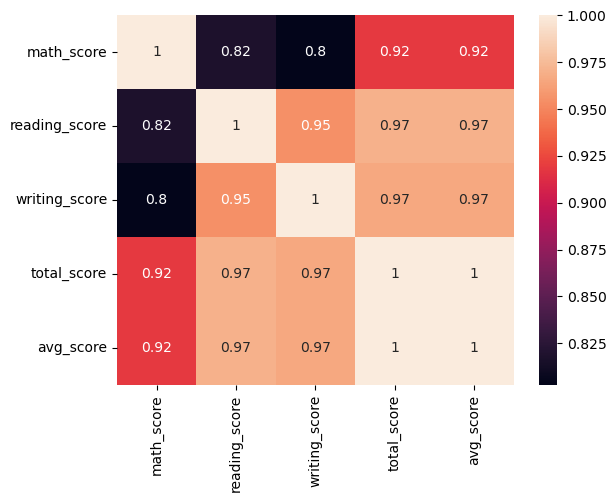

In [64]:
sns.heatmap(df.corr(),annot=True)

- Reading score and writing score are highly correlated.
